<a href="https://colab.research.google.com/github/2303A51125/ADM_lab/blob/main/ADM_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [101]:
np.random.seed(42)
data  = np.random.normal(0, 1, 100)
outliers = np.random.uniform(5, 10, 5)
data_with_outliers = np.concatenate([data, outliers])


In [102]:

df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [103]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [104]:
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

In [105]:
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

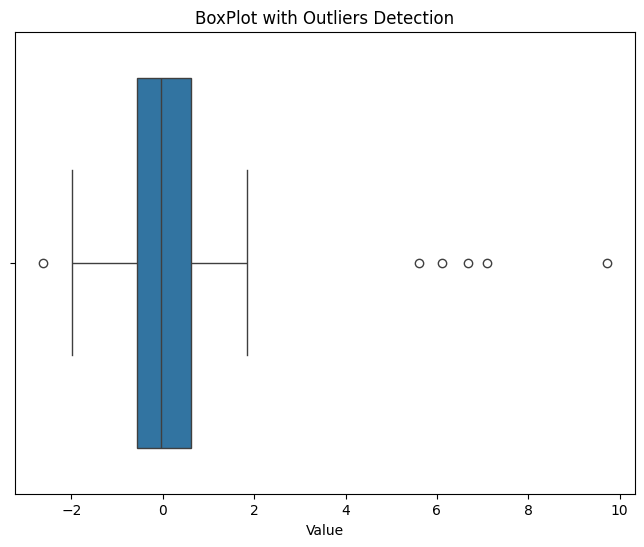

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("BoxPlot with Outliers Detection")
plt.show()

In [107]:
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], upper_bound, lower_bound)

In [108]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) & (df_removed['Value'] <= upper_bound)]

In [109]:
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

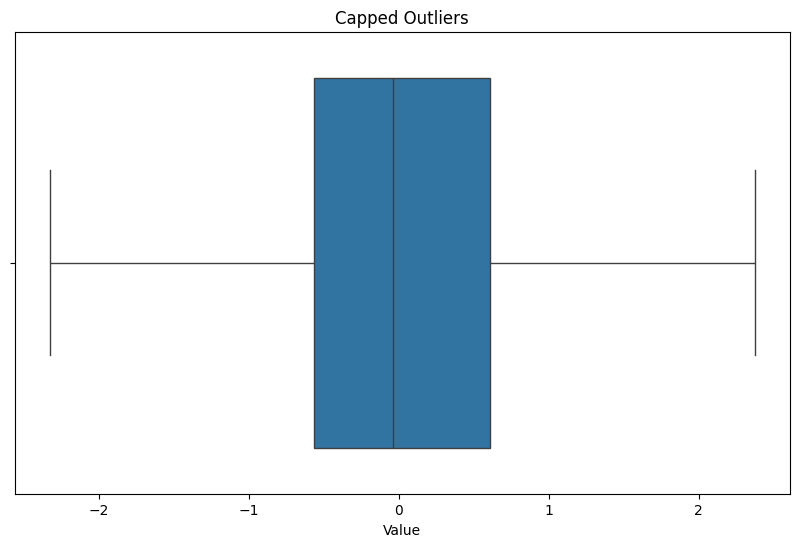

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()

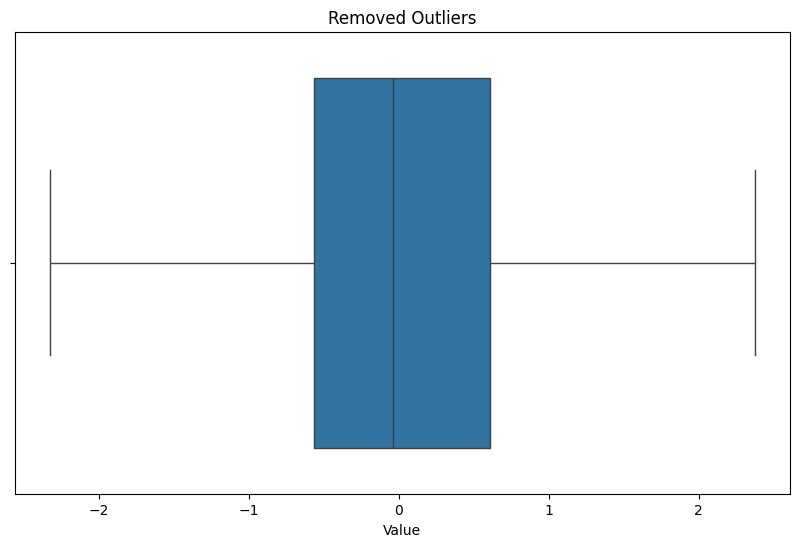

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Removed Outliers")
plt.show()

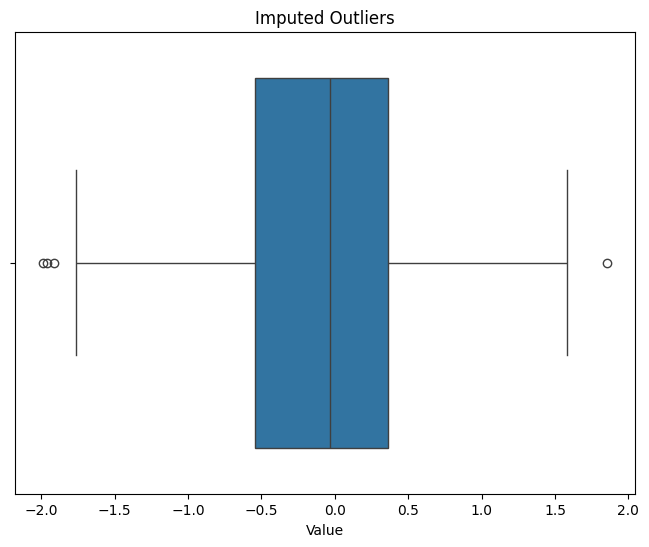

In [112]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()

In [113]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-score:\n{outliers_zscore}")

Outliers detected using IQR:
        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
Outliers detected using Z-score:
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
